In [1]:
# Dependencies
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the merged crime and weather data from saved files   
merged_table = pd.read_csv('./Resources/merged_crime_and_weather_data.csv')
merged_table['date'] = pd.to_datetime(merged_table['date'])
merged_table['temp'] = merged_table['temp'].astype('int')

In [3]:
# Bin the crime count by temperature ranges of 10 to better see the crime distribution by temperature
bins = [0,10, 20, 30, 40, 50, 60,70,80,90,100]
# Create the names for the four bins
group_names = ["0","10", "20", "30", "40", "50", "60","70","80","90"]
merged_table["Temp Summary"] = pd.cut(merged_table["temp"], bins, labels=group_names)

In [4]:
merged_table.head()

,date,primary_type,temp,date_trunc,year,Temp Summary
0,2015-12-31 23:00:00,THEFT,24,2015-12-31 00:00:00,2015.0,20
1,2015-12-31 23:00:00,CRIMINAL DAMAGE,24,2015-12-31 00:00:00,2015.0,20
2,2015-12-31 23:00:00,BATTERY,24,2015-12-31 00:00:00,2015.0,20
3,2015-12-31 23:00:00,THEFT,24,2015-12-31 00:00:00,2015.0,20
4,2015-12-31 23:00:00,BATTERY,24,2015-12-31 00:00:00,2015.0,20


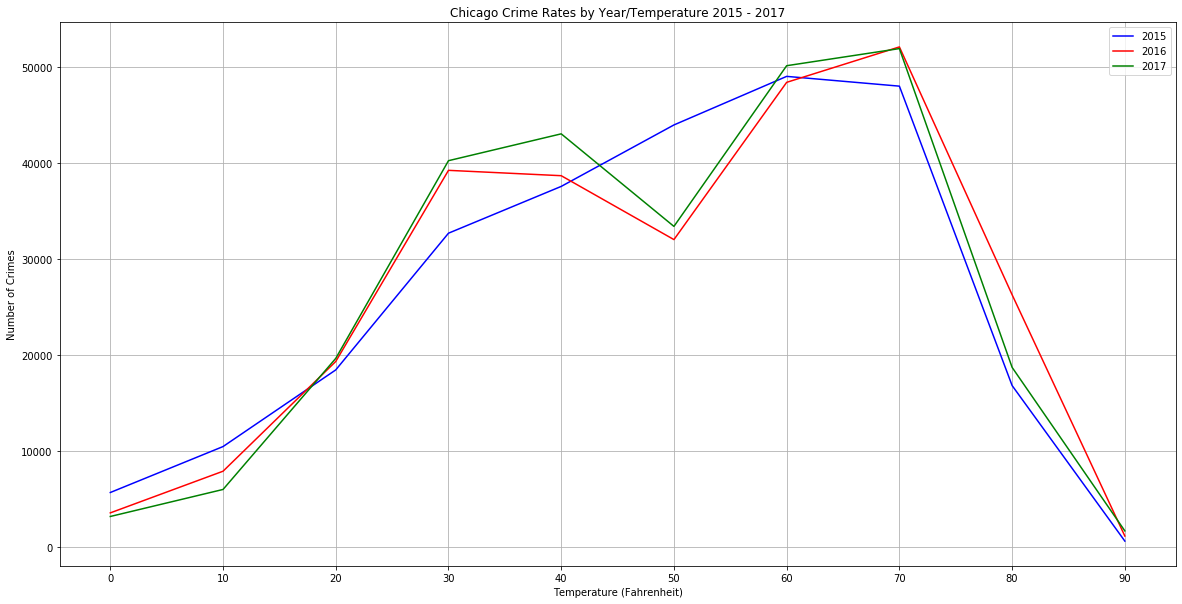

In [5]:
# Compare the crime rates by temperatue for the top 4 crime types
grouped_crime_df = merged_table.groupby(['Temp Summary','year']).count()
grouped_crime_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
grouped_crime_df = grouped_crime_df.reset_index()

# set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

x_axis = np.arange(0,100,10)

crime_2015 = grouped_crime_df['date'][grouped_crime_df['year'] == 2015]
crime_2016 = grouped_crime_df['date'][grouped_crime_df['year'] == 2016]
crime_2017 = grouped_crime_df['date'][grouped_crime_df['year'] == 2017]

# Add labels to the x and y axes
plt.title("Chicago Crime Rates by Year/Temperature 2015 - 2017")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of Crimes")

# Set a grid on the plot
plt.grid()

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Create a handle for each plot
five, = plt.plot(x_axis, crime_2015,  color="blue", label='2015')
six, = plt.plot(x_axis, crime_2016,  color="red", label='2016')
seven, = plt.plot(x_axis, crime_2017, color="green", label='2017')

# Set our legend to where the chart thinks is best
plt.legend(handles=[five,six,seven], loc="best")
plt.savefig("./Images/line_by_year_by_temp.png")